*This data comes from kaggle.com and can be found [here](https://www.kaggle.com/nathanlauga/nba-games). This dataset is for all NBA regular & post season games from the October 2003 to June 2019.*

## Question 1: Are three point attemps on average increasing in the NBA over time? 

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [2]:
# See Clean_Df.py where I cleanned the data and pickled it.
df = pd.read_pickle('dataset.pickle')

In [3]:
# summarize FG3 data by game ID
df_3pt = df.groupby(['GAME_ID','GAME_DATE_EST'])[['FG3A','FG3M']].apply(sum)

# Then summarize further FG3 data by date showing avg FG3 per game
df_3pt = df_3pt.groupby(['GAME_DATE_EST'])[['FG3A','FG3M']].mean()

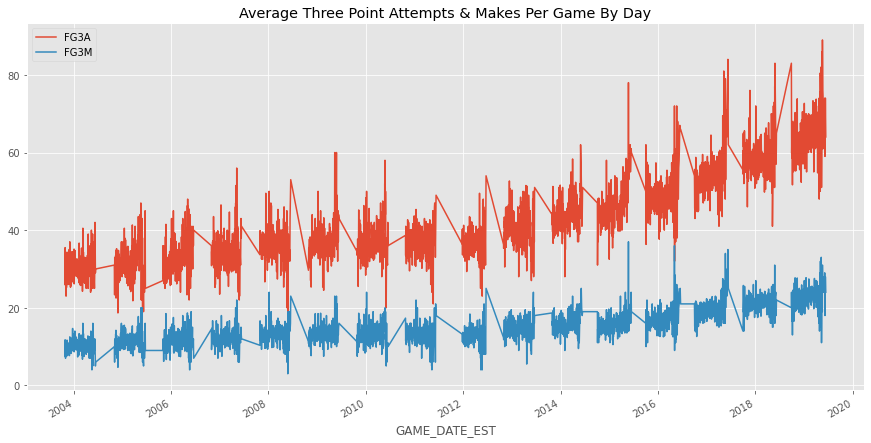

In [4]:
df_3pt.plot(figsize=(15,7.5),title='Average Three Point Attempts & Makes Per Game By Day')

plt.show()

#### *The graph above is a little busy showing a data point for each day. I want to zoom out and have the data point show monthly averages instead. Below I summarize the data to show the average three point attempts and makes per month over time. Then plot the results*

In [5]:
df_3pt_bymonth = df.copy()

In [6]:
# summarize FG3 data by game ID
df_3pt_bymonth = df_3pt_bymonth.groupby(['GAME_ID','Year-Month'])[['FG3A','FG3M']].apply(sum)


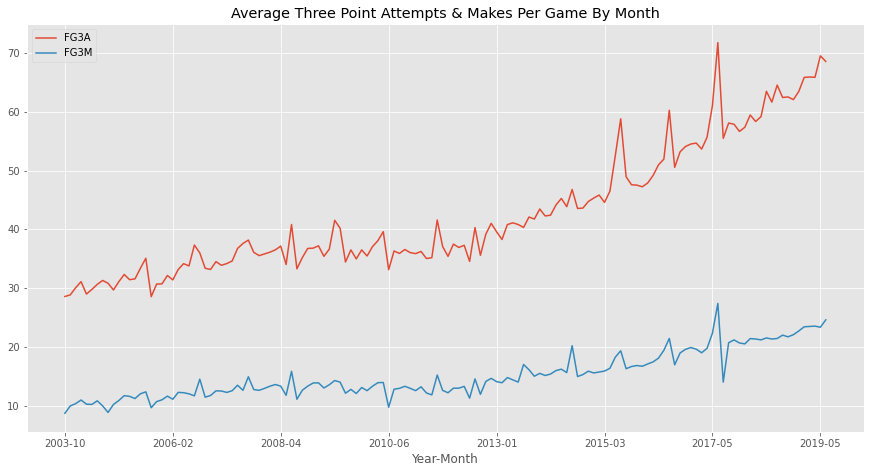

In [7]:
# Then summarize further FG3 data by date showing avg FG3 per game
df_3pt_bymonth = df_3pt_bymonth.groupby(['Year-Month'])[['FG3A','FG3M']].mean()

df_3pt_bymonth.plot(figsize=(15,7.5),title='Average Three Point Attempts & Makes Per Game By Month')

plt.show()

#### *The graph above is a lot cleaner and easier to see the trend of 3 pointers over time. Showing an upward trend*  

## Question 2: Is 3 point FG percentage increasing or decreasing over time?

In [8]:
df_3pt_percent = df_3pt_bymonth.copy()

In [9]:
# Create column FG3%
df_3pt_percent['FG3%'] = df_3pt_percent['FG3M'] / df_3pt_percent['FG3A']

In [10]:
# remove columns FG3A & FG3M, so it only shows the 3 point %
df_3pt_percent = df_3pt_percent.drop(['FG3A', 'FG3M'], axis=1)

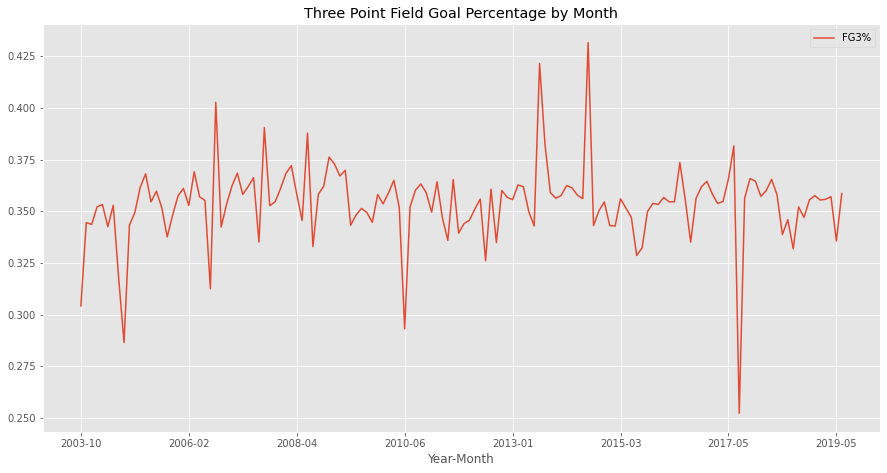

In [11]:
# plot
df_3pt_percent.plot(figsize=(15,7.5),title='Three Point Field Goal Percentage by Month')

plt.show()

#### *It is hard to see a significant trend. The average three point field goal percentages seems to fluctuate between 32.5% and 37.5%*

## Question 4: Have the number on NBA players shooting 3 pointers per game increased over time?

In [12]:
df_avg_3Pt_Shooters = df.copy()

In [13]:
# Remove rows where FG3A = 0
df_avg_3Pt_Shooters = df_avg_3Pt_Shooters[df_avg_3Pt_Shooters['FG3A'] != 0]

In [14]:
# summarize FG3 data by Player Name and Month
df_avg_3Pt_Shooters = df_avg_3Pt_Shooters.groupby(['Year-Month','PLAYER_NAME'])[['FG3A']].apply(sum)

In [15]:
# Count # of unique 3 pt shooters by month
df_avg_3Pt_Shooters = df_avg_3Pt_Shooters.groupby(['Year-Month'])[['FG3A']].count()

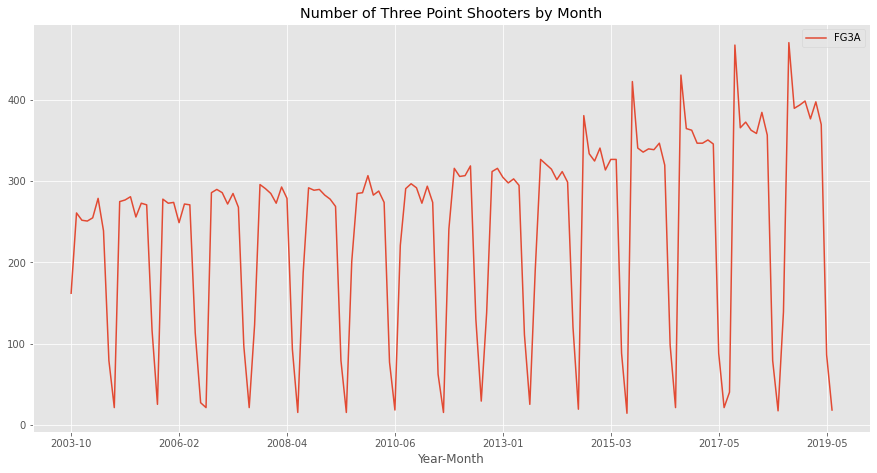

In [16]:
# plot
df_avg_3Pt_Shooters.plot(figsize=(15,7.5),title='Number of Three Point Shooters by Month')

plt.show()

#### *This graph is interesting. The deep valley's are during the playoffs where less games are being played. But in recent years we see large spikes of players shooting three's at the begining of each season and then as the season less number of players are shooting three's decreases.*


